In [45]:
# importing the libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [46]:
y = pd.read_csv('data/tags.csv')

print(y.shape)
print(y)

(40, 1)
    label
0       1
1       0
2       1
3       0
4       1
5       0
6       1
7       0
8       1
9       0
10      1
11      0
12      1
13      0
14      1
15      0
16      1
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      1
25      0
26      1
27      0
28      1
29      0
30      1
31      0
32      1
33      0
34      1
35      0
36      1
37      0
38      1
39      0


In [47]:
train_set = []

for i in range(20):
    img_dog = cv2.imread('data/train/dogs/dog' + str(i + 1) + '.jpg')
    img_dog = cv2.resize(img_dog, (500, 500))
    img_dog = np.array(img_dog).flatten()
    
    train_set.append(img_dog)
    
    img_cat = cv2.imread('data/train/cats/cat' + str(i + 1) + '.jpg')
    img_cat = cv2.resize(img_cat, (500, 500))
    img_cat = np.array(img_cat).flatten()
    
    train_set.append(img_cat)
      

In [48]:
print(len(train_set))
print(type(train_set))

40
<class 'list'>


In [56]:
# we need to convert this into numpy array

X = np.array(train_set)
print(X.shape)
print(type(X))
print("training examples : ", X.shape[0])
print("Flattened image size : ", X.shape[1])

(40, 750000)
<class 'numpy.ndarray'>
training examples :  40
Flattened image size :  750000


In [76]:
#splitting the data set into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle = True, test_size = 0.20)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 750000)
(32, 1)
(8, 750000)
(8, 1)


In [78]:
from sklearn.linear_model import LogisticRegression

le = LogisticRegression(max_iter = 10)
le.fit(X_train, y_train) # fitting the model on the training data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
le.score(X_train, y_train)

1.0

In [80]:
le.score(X_test, y_test)

0.5

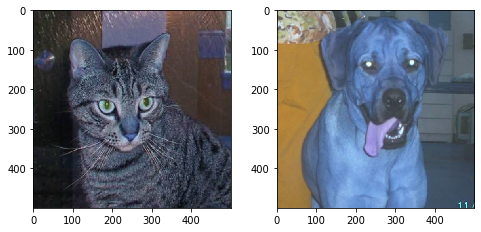

In [85]:
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.imshow(X_test[0].reshape(500, 500, 3))

plt.subplot(2, 2, 2)
plt.imshow(X_test[2].reshape(500, 500, 3))


In [86]:
le.predict(X_test[0].reshape(1, -1))

array([0], dtype=int64)

In [87]:
le.predict(X_test[2].reshape(1, -1))

array([0], dtype=int64)